## Bank transactions dataset

### Research question & sub questions

#### How can a bank effectively segment its customers based on transactional behavior to enhance personalized marketing and improve customer satisfaction?
- What distinct transaction patterns can be identified among different customer segments in the bank's transaction dataset?
- How can customers be effectively segmented based on their transactional behaviors such as frequency, amount, and types of transactions?
- What insights can be obtained about customer preferences and behaviors from the transaction data, and how can these insights be leveraged to enhance service offerings?
- Can the transaction patterns identified be used to predict future customer behaviors or needs, and how can this predictive analysis be integrated into the bank's strategic planning?


### Dataset

- TransactionID: Unique identifier for each transaction.
- CustomerID: Unique identifier for each customer.
- CustomerDOB: Date of birth of the customer.
- CustGender: Gender of the customer.
- CustLocation: Location of the customer.
- CustAccountBalance: Account balance of the customer.
- TransactionDate: Date of the transaction.
- TransactionTime: Time of the transaction.
- TransactionAmount (INR): Amount of the transaction in Indian Rupees.

In [2]:
# Importing the basic libraries
import pandas as pd
import os
import scipy
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import numpy as np
#display all columns 
from IPython.display import display
pd.set_option('display.max_columns', None)

### 1. EDA, Data cleaning and Feature engineering
There are cases when these three processes are done in tandem.

In [3]:
# Reading the DataFrame
df = pd.read_csv(r"C:\Users\alvarocairo\bank_transactions.csv")
print("There are {} rows and {} columns in the dataset".format(df.shape[0], df.shape[1]))

# Showing the Dataset
df

There are 1048567 rows and 9 columns in the dataset


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [4]:
# Info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
# Descprition off the AccountBalance & TransactionAmount columns
df[['CustAccountBalance', 'TransactionAmount (INR)']].describe()

,CustAccountBalance,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06
mean,1.154035e+05,1.574335e+03
std,8.464854e+05,6.574743e+03
min,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.610000e+02
50%,1.679218e+04,4.590300e+02
75%,5.765736e+04,1.200000e+03
max,1.150355e+08,1.560035e+06


In [6]:
# Display the datatypes in the DataFrame
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [7]:
# Checking for null values
n_nulls = df.loc[lambda x: x.isnull().any(axis=1)].shape
print(f"There are {n_nulls[0]} rows with null values in this dataset")

null_values = df.isnull().sum()
print("Number of null values in each column:")
print(null_values)

There are 6953 rows with null values in this dataset
Number of null values in each column:
TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [8]:
# Droping rows with null values
df.dropna(how='any', inplace=True)

print(f"Number of rows after removing empty rows: {df.shape[0]}")

Number of rows after removing empty rows: 1041614


In [9]:
# Making Male and Female 0 and 1 using mapping
gender_mapping = {'M': 0, 'F': 1}

# Apply the mapping to the column
df['CustGender'] = df['CustGender'].map(gender_mapping)

# Display the column after conversion
print("Updated Gender Column:")
print(df['CustGender'])

Updated Gender Column:
0          1.0
1          0.0
2          1.0
3          1.0
4          1.0
          ... 
1048562    0.0
1048563    0.0
1048564    0.0
1048565    0.0
1048566    0.0
Name: CustGender, Length: 1041614, dtype: float64


In [10]:
# Checking if the Transaction ID's are unique
if (len(df['TransactionID'].unique()) == len(df)):
    print("Transaction ID's are unique, no need to aggregate")
else:
    print("Transaction ID's are not unique, need to aggregate")

Transaction ID's are unique, no need to aggregate


In [11]:
# Dropping the column
df.drop(['TransactionID'], axis = 1, inplace=True)
df.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,C5841053,10/1/94,1.0,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,C2142763,4/4/57,0.0,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,C4417068,26/11/96,1.0,MUMBAI,17874.44,2/8/16,142712,459.0
3,C5342380,14/9/73,1.0,MUMBAI,866503.21,2/8/16,142714,2060.0
4,C9031234,24/3/88,1.0,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [12]:
from datetime import datetime

# Convert 'CustomerDOB' to datetime object and fix century for year
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format='%d/%m/%y', errors='coerce')
df['CustomerDOB'] = df['CustomerDOB'].apply(lambda x: x if x.year < 2023 else x.replace(year=x.year-100))

# Calculate age
current_year = datetime.now().year
df['CustomerAge'] = current_year - df['CustomerDOB'].dt.year

# Dropping the original 'CustomerDOB' column
df.drop('CustomerDOB', axis=1, inplace=True)

# Displaying the first few rows of the updated dataframe
df.head()

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,C5841053,1.0,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,29.0
1,C2142763,0.0,JHAJJAR,2270.69,2/8/16,141858,27999.0,66.0
2,C4417068,1.0,MUMBAI,17874.44,2/8/16,142712,459.0,27.0
3,C5342380,1.0,MUMBAI,866503.21,2/8/16,142714,2060.0,50.0
4,C9031234,1.0,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,35.0


In [13]:
# Checking number of NaNs in df
nans_in_customer_age = df['CustomerAge'].isna().sum()
print(f"Number of NaNs in 'CustomerAge': {nans_in_customer_age}")

Number of NaNs in 'CustomerAge': 56292


In [14]:
# Drop rows where 'CustomerAge' is NaN
df.dropna(subset=['CustomerAge'], inplace=True)

nans_in_customer_age = df['CustomerAge'].isna().sum()
print(f"Number of NaNs in 'CustomerAge': {nans_in_customer_age}")

Number of NaNs in 'CustomerAge': 0


In [15]:
# Count the unique values in the 'CustLocation' column
unique_cities = df['CustLocation'].nunique()

# Print the number of different cities
print(f"There are {unique_cities} different cities in the 'CustLocation' column.")

There are 8164 different cities in the 'CustLocation' column.


In [16]:

# Count the unique values in the 'CustLocation' column
city_counts = df['CustLocation'].value_counts()

# Group cities based on their occurrences
grouped_cities = {}
for city, count in city_counts.items():
    if count not in grouped_cities:
        grouped_cities[count] = [city]
    else:
        grouped_cities[count].append(city)

# Print the grouped cities
for count, city_list in grouped_cities.items():
    print(f"Cities that occur {count} times: {', '.join(city_list)}")


Cities that occur 97679 times: MUMBAI
Cities that occur 77751 times: BANGALORE
Cities that occur 76380 times: NEW DELHI
Cities that occur 70518 times: GURGAON
Cities that occur 67335 times: DELHI
Cities that occur 31675 times: NOIDA
Cities that occur 27500 times: CHENNAI
Cities that occur 24493 times: PUNE
Cities that occur 21819 times: HYDERABAD
Cities that occur 21006 times: THANE
Cities that occur 19033 times: KOLKATA
Cities that occur 14624 times: GHAZIABAD
Cities that occur 11932 times: NAVI MUMBAI
Cities that occur 11266 times: AHMEDABAD
Cities that occur 10641 times: FARIDABAD
Cities that occur 9231 times: JAIPUR
Cities that occur 8801 times: CHANDIGARH
Cities that occur 7338 times: LUCKNOW
Cities that occur 5828 times: MOHALI
Cities that occur 5173 times: SURAT
Cities that occur 4645 times: NASHIK
Cities that occur 4354 times: LUDHIANA
Cities that occur 4173 times: VISAKHAPATNAM
Cities that occur 3961 times: DEHRADUN
Cities that occur 3620 times: INDORE
Cities that occur 3584 t

In [17]:
# Count the occurrences of each city in the 'CustLocation' column
city_counts = df['CustLocation'].value_counts()

# Identify the top 10 most frequent locations
top_locations = city_counts.head(10).index.tolist()

# Create a new column 'GroupedLocation' based on the top locations and 'Others'
df['GroupedLocation'] = df['CustLocation'].apply(lambda x: x if x in top_locations else 'Others')

# Count the occurrences of each grouped location
grouped_counts = df['GroupedLocation'].value_counts()

# Print the grouped locations
for location, count in grouped_counts.items():
    print(f"Location: {location}, Count: {count}")

Location: Others, Count: 469166
Location: MUMBAI, Count: 97679
Location: BANGALORE, Count: 77751
Location: NEW DELHI, Count: 76380
Location: GURGAON, Count: 70518
Location: DELHI, Count: 67335
Location: NOIDA, Count: 31675
Location: CHENNAI, Count: 27500
Location: PUNE, Count: 24493
Location: HYDERABAD, Count: 21819
Location: THANE, Count: 21006


In [18]:
# Count the occurrences of each city
city_counts = df['CustLocation'].value_counts()

# Identify the top 10 most frequent locations
top_cities = city_counts.head(10)

# Create a DataFrame with the top cities and their counts
top_cities_table = pd.DataFrame({'City': top_cities.index, 'Count': top_cities.values})

# Add a row for 'Others' by summing counts of cities beyond the top 9
other_count = city_counts.iloc[5:].sum()
other_row = pd.DataFrame({'City': ['Others'], 'Count': [other_count]})
top_cities_table = pd.concat([top_cities_table, other_row], ignore_index=True)

# Sort the table in decreasing order by count
top_cities_table = top_cities_table.sort_values(by='Count', ascending=False)

# Reset index for a clean table
top_cities_table.reset_index(drop=True, inplace=True)

# Print the resulting table
print(top_cities_table)

         City   Count
0      Others  595659
1      MUMBAI   97679
2   BANGALORE   77751
3   NEW DELHI   76380
4     GURGAON   70518
5       DELHI   67335
6       NOIDA   31675
7     CHENNAI   27500
8        PUNE   24493
9   HYDERABAD   21819
10      THANE   21006


In [19]:
# Define a dictionary mapping city names to numerical values
city_to_num = {
    'MUMBAI': 1,
    'BANGALORE': 2,
    'NEW DELHI': 3,
    'GURGAON': 4,
    'DELHI': 5,
    'NOIDA': 6,
    'CHENNAI': 7,
    'PUNE': 8,
    'HYDERABAD': 9,
    'THANE': 10
}

# Apply the mapping to the 'CustLocation' column, replace other values with 0
df['CustLocation'] = df['CustLocation'].map(city_to_num).fillna(0)

# Now df['CustLocation'] will have numerical values as per your requirement
df

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,GroupedLocation
0,C5841053,1.0,0.0,17819.05,2/8/16,143207,25.0,29.0,Others
1,C2142763,0.0,0.0,2270.69,2/8/16,141858,27999.0,66.0,Others
2,C4417068,1.0,1.0,17874.44,2/8/16,142712,459.0,27.0,MUMBAI
3,C5342380,1.0,1.0,866503.21,2/8/16,142714,2060.0,50.0,MUMBAI
4,C9031234,1.0,0.0,6714.43,2/8/16,181156,1762.5,35.0,Others
...,...,...,...,...,...,...,...,...,...
1048562,C8020229,0.0,3.0,7635.19,18/9/16,184824,799.0,33.0,NEW DELHI
1048563,C6459278,0.0,0.0,27311.42,18/9/16,183734,460.0,31.0,Others
1048564,C6412354,0.0,9.0,221757.06,18/9/16,183313,770.0,34.0,HYDERABAD
1048565,C6420483,0.0,0.0,10117.87,18/9/16,184706,1000.0,45.0,Others


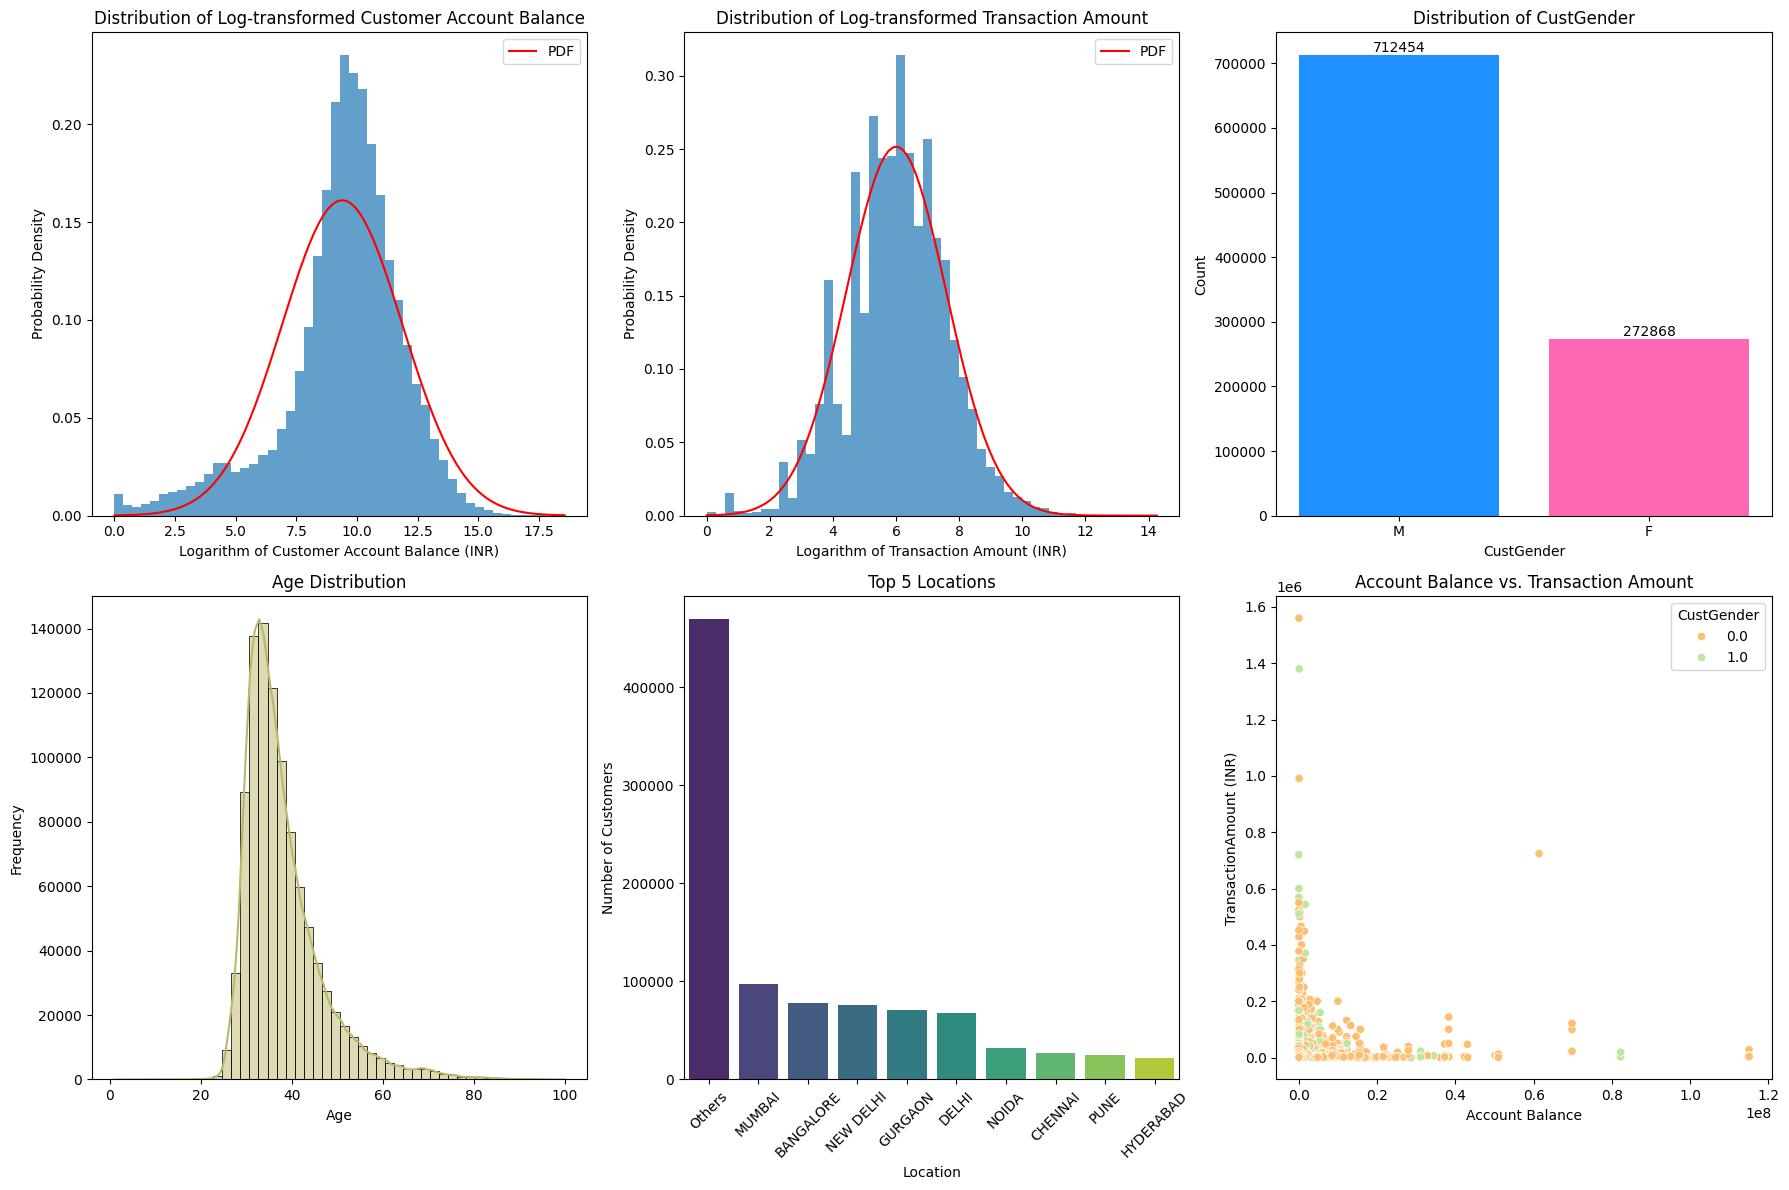

In [20]:
# Data Visualization using 6 Different Plots
from scipy import stats
import seaborn as sns

# Create a figure and a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  

# Plot 1: Histogram of CustAccountBalance
log_balance = np.log1p(df['CustAccountBalance'])
axs[0, 0].hist(log_balance, bins=50, density=True, alpha=0.7)
axs[0, 0].set_xlabel('Logarithm of Customer Account Balance (INR)')
axs[0, 0].set_ylabel('Probability Density')
axs[0, 0].set_title('Distribution of Log-transformed Customer Account Balance')
x = np.linspace(log_balance.min(), log_balance.max(), 100)
dist = stats.norm(log_balance.mean(), log_balance.std())
axs[0, 0].plot(x, dist.pdf(x), color='red', label='PDF')
axs[0, 0].legend()

# Plot 2: Histogram of 'TransactionAmount (INR)'
log_trx_amount = np.log1p(df['TransactionAmount (INR)'])
axs[0, 1].hist(log_trx_amount, bins=50, density=True, alpha=0.7)
axs[0, 1].set_xlabel('Logarithm of Transaction Amount (INR)')
axs[0, 1].set_ylabel('Probability Density')
axs[0, 1].set_title('Distribution of Log-transformed Transaction Amount')
x = np.linspace(log_trx_amount.min(), log_trx_amount.max(), 100)
dist = stats.norm(log_trx_amount.mean(), log_trx_amount.std())
axs[0, 1].plot(x, dist.pdf(x), color='red', label='PDF')
axs[0, 1].legend()

# Plot 3: Distribution of CustGender
gender_counts = df['CustGender'].value_counts()
colors = ['dodgerblue', 'hotpink']  # Assign colors for each gender
axs[0, 2].bar(range(len(gender_counts)), gender_counts.values, color=colors)
axs[0, 2].set_xlabel('CustGender')
axs[0, 2].set_ylabel('Count')
axs[0, 2].set_title('Distribution of CustGender')
for i, count in enumerate(gender_counts.values):
    axs[0, 2].text(i, count, str(count), ha='center', va='bottom')
axs[0, 2].set_xticks(range(len(gender_counts)))
axs[0, 2].set_xticklabels(['M', 'F']) 


# Plot 4: Age Distribution of Customers
sns.histplot(df['CustomerAge'].dropna(), bins=50, kde=True, color='darkkhaki', ax=axs[1, 0])
axs[1, 0].set_title('Age Distribution')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Frequency')

# Plot 5: Top 10 Customer Locations
top_locations = df['GroupedLocation'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Top 5 Locations')
axs[1, 1].set_xlabel('Location')
axs[1, 1].set_ylabel('Number of Customers')
axs[1, 1].tick_params(axis='x', rotation=45)

# Plot 6: Scatterplot of Account Balance vs. Transaction Amount
sns.scatterplot(data=df, x='CustAccountBalance', y='TransactionAmount (INR)', hue='CustGender', palette='Spectral', ax=axs[1, 2])
axs[1, 2].set_title('Account Balance vs. Transaction Amount')
axs[1, 2].set_xlabel('Account Balance')
axs[1, 2].set_ylabel('TransactionAmount (INR)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

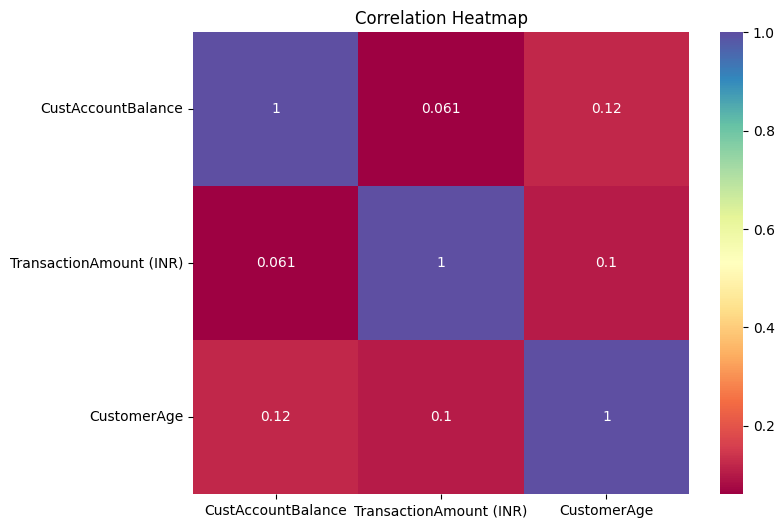

In [21]:
# Plot 7: Heatmap of Correlations Among Numerical Features
# Calculate the correlation matrix
corr = df[['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge']].corr()

# Create a new figure for the heatmap
plt.figure(figsize=(8, 6)) 

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='Spectral')
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()

T-Statistic for Gender-Based Transaction Amounts: nan
P-value for Gender-Based Transaction Amounts: nan


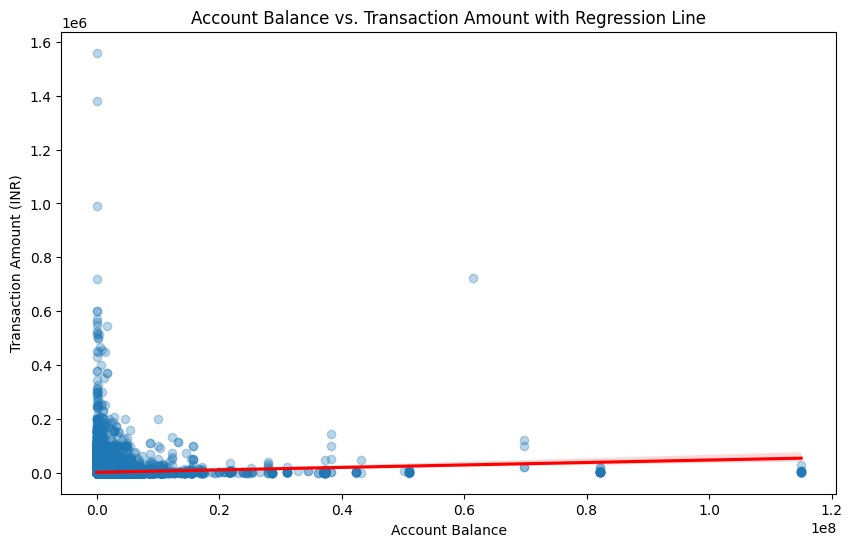

<Figure size 1600x800 with 0 Axes>

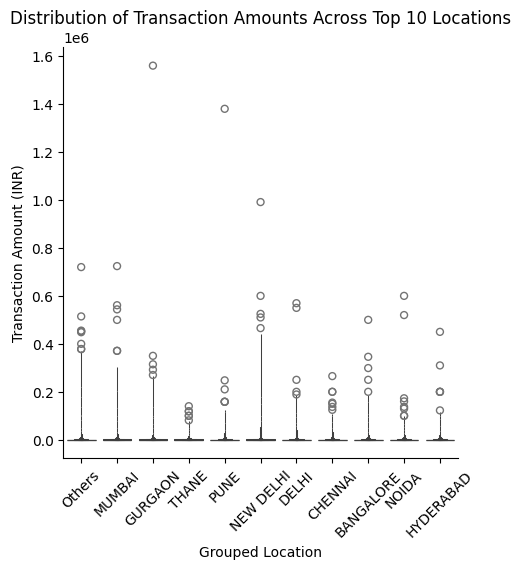

Number of Outliers in Transaction Amounts: 105766
Statistical Summary of Outlier Transactions:
           CustGender   CustLocation  CustAccountBalance  TransactionTime  \
count  105766.000000  105766.000000        1.057660e+05    105766.000000   
mean        0.322675       2.101110        2.586439e+05    160865.727190   
std         0.467502       2.680216        1.714728e+06     46420.751689   
min         0.000000       0.000000        0.000000e+00         0.000000   
25%         0.000000       0.000000        1.098187e+04    133358.000000   
50%         0.000000       1.000000        3.972547e+04    165709.500000   
75%         1.000000       4.000000        1.430969e+05    194745.000000   
max         1.000000      10.000000        1.150355e+08    235951.000000   

       TransactionAmount (INR)    CustomerAge  
count             1.057660e+05  105766.000000  
mean              8.800254e+03      41.939139  
std               1.696464e+04      10.485878  
min               2.586130e

In [22]:
# 1.6.1 Advanced Statistical Analysis
# T-test to compare means of Transaction Amounts between two genders
male_transactions = df[df['CustGender'] == '0.']['TransactionAmount (INR)']
female_transactions = df[df['CustGender'] == '1.']['TransactionAmount (INR)']

t_stat, p_value = stats.ttest_ind(male_transactions, female_transactions, nan_policy='omit')
print("T-Statistic for Gender-Based Transaction Amounts:", t_stat)
print("P-value for Gender-Based Transaction Amounts:", p_value)

# 1.6.2 Enhanced Visualization - Scatter Plot with Regression Line
# Example: Relationship between Account Balance and Transaction Amount
plt.figure(figsize=(10, 6))
sns.regplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Account Balance vs. Transaction Amount with Regression Line')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount (INR)')
plt.show()

# 1.6.3 Categorical Analysis
# Example: Distribution of Transaction Amounts across different Locations
top_10_locations = df['GroupedLocation'].value_counts().head(11).index

# Filter the dataset to include only transactions from these top 10 locations
top_10_locations_df = df[df['GroupedLocation'].isin(top_10_locations)]

# Visualization of Transaction Amounts for the Top 10 Locations
plt.figure(figsize=(16, 8))
sns.catplot(x='GroupedLocation', y='TransactionAmount (INR)', kind='boxen', data=top_10_locations_df)
plt.title('Distribution of Transaction Amounts Across Top 10 Locations')
plt.xlabel('Grouped Location')
plt.xticks(rotation=45)
plt.ylabel('Transaction Amount (INR)')
plt.show()

# 1.6.4 Outlier Analysis
# Identifying outliers in 'TransactionAmount (INR)'
Q1 = df['TransactionAmount (INR)'].quantile(0.25)
Q3 = df['TransactionAmount (INR)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[df['TransactionAmount (INR)'] > (Q3 + 1.5 * IQR)]
print("Number of Outliers in Transaction Amounts:", outliers.shape[0])

# Analyzing Characteristics of Outlier Transactions
outlier_analysis = outliers.describe()
print("Statistical Summary of Outlier Transactions:\n", outlier_analysis)


In [23]:
# Load the datasets
bank_transactions_file = 'C:/Users/alvarocairo/bank_transactions.csv'
indian_cities_file = 'C:/Users/alvarocairo/India cities.csv'

bank_transactions = pd.read_csv(bank_transactions_file)
indian_cities = pd.read_csv(indian_cities_file)

In [24]:
# Extracting city names from the indiancities DataFrame
known_cities = indian_cities['city'].tolist()

# Define the clean_location function
def clean_location(location, known_cities):
    if not isinstance(location, str):  # Check if the location is a string
        return location  # If not, return as is (could be NaN or other types)
    for city in known_cities:
        if city in location:
            return city
    return location  # Or 'Unknown' if you want to label unrecognized patterns

# Clean the 'CustLocation' column
bank_transactions['CustLocation'] = bank_transactions['CustLocation'].apply(lambda x: clean_location(x, known_cities))

# Check the cleaning
print(bank_transactions['CustLocation'].head(5))

0     JAMSHEDPUR
1        JHAJJAR
2         MUMBAI
3         MUMBAI
4    NAVI MUMBAI
Name: CustLocation, dtype: object


In [25]:
# Check for missing values
print("Missing values:", bank_transactions['CustLocation'].isnull().sum())

# Check for unique values to understand the data better
print("Unique locations:", bank_transactions['CustLocation'].nunique())

# View a sample of unique locations
print(bank_transactions['CustLocation'].dropna().unique()[:5])


Missing values: 151
Unique locations: 9355
['JAMSHEDPUR' 'JHAJJAR' 'MUMBAI' 'NAVI MUMBAI' 'ITANAGAR']


In [26]:
print(indian_cities['city'].dropna().unique()[:5])

['Delhi' 'Mumbai' 'Kolkāta' 'Bangalore' 'Chennai']


In [27]:
# Example: Standardize the text format (e.g., title case)
bank_transactions['CustLocation'] = bank_transactions['CustLocation'].str.title()

In [28]:
# Merge the datasets
# 'CustLocation' in bank_transactions is matched with 'city' in indiancities
bank_transactions = pd.merge(bank_transactions, indian_cities, left_on='CustLocation', right_on='city', how='left')

# Optionally, if you don't want to keep the 'city' column from indiancities, you can drop it
bank_transactions = bank_transactions.drop(columns=['city'])

In [29]:
# List the columns you want to drop
columns_to_drop = ['admin_name', 'iso2', 'capital', 'population', 'population_proper']  # Replace with the names of the columns you want to drop

# Drop the columns
bank_transactions = bank_transactions.drop(columns=columns_to_drop)

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the data with latitude and longitude

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame for customer locations
gdf = gpd.GeoDataFrame(bank_transactions, geometry=gpd.points_from_xy(bank_transactions['lng'], bank_transactions['lat']))

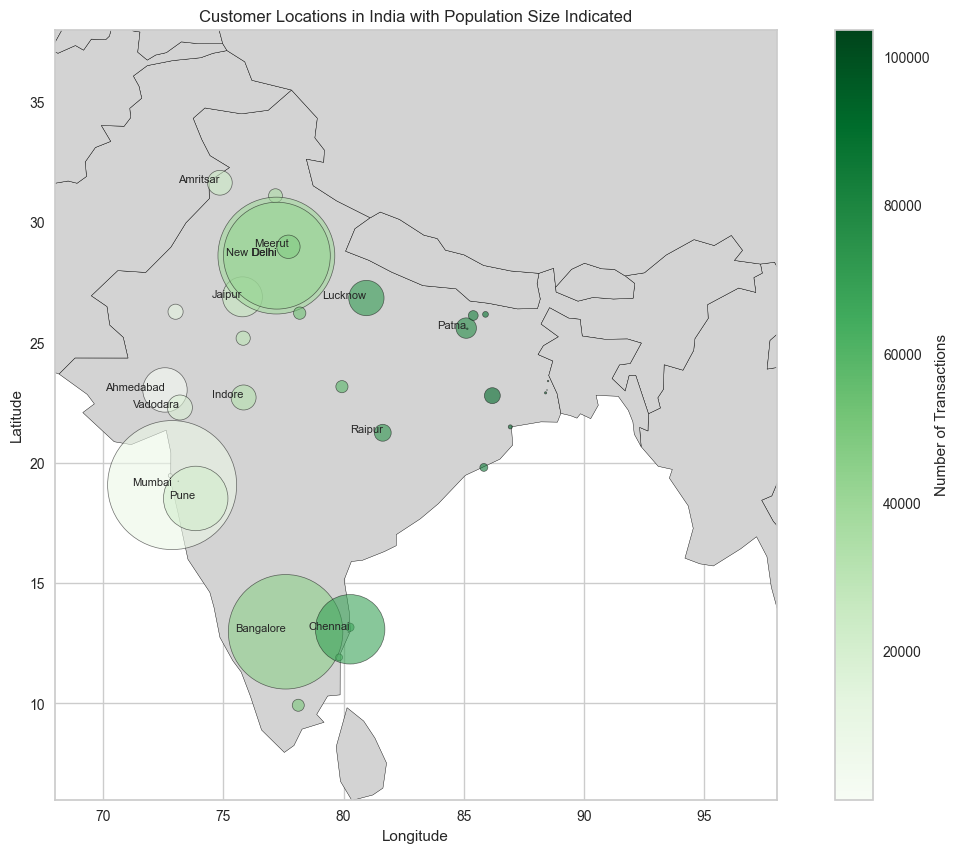

In [40]:
# Assuming bank_transactions is already loaded and contains 'lng', 'lat', and 'city' columns
# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Aggregate data to count the number of occurrences per location
location_counts = bank_transactions.groupby(['lng', 'lat']).size().reset_index(name='count')

# Normalize the size of the markers
scale_factor = 12  # Adjust this scale factor as needed
location_counts['markersize'] = location_counts['count'] / scale_factor

# Join the city names from bank_transactions to the aggregated data
# This assumes that the bank_transactions dataframe has a 'city' column with city names
agg_with_names = location_counts.merge(bank_transactions[['lng', 'lat', 'CustLocation']].drop_duplicates(), on=['lng', 'lat'], how='left')

# Create a GeoDataFrame for the aggregated data
gdf_aggregated = gpd.GeoDataFrame(agg_with_names, geometry=gpd.points_from_xy(agg_with_names['lng'], agg_with_names['lat']))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
gdf_aggregated.plot(ax=ax, markersize=gdf_aggregated['markersize'], cmap='Greens', alpha=0.6, edgecolor='k', linewidth=0.5)

# Determine the number of top locations you want to label
top_n = 15  # You can adjust this number as needed

# Find the top N locations by count
top_locations = gdf_aggregated.nlargest(top_n, 'count')

# Add labels for top N locations
for idx, row in top_locations.iterrows():
    ax.text(row['geometry'].x, row['geometry'].y, row['CustLocation'], fontsize=8, ha='right')

# Zoom into India
ax.set_xlim(68, 98)  # Longitude limits for India
ax.set_ylim(6, 38)  # Latitude limits for India

plt.title('Customer Locations in India with Population Size Indicated')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=location_counts['count'].min(), vmax=location_counts['count'].max()))
sm._A = []  # Create an empty array for the data range
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Number of Transactions')

plt.show()


### 2. PCA
Here we will perform PCA on the processed dataset. In order to do that we need to first standardize the dataset.

In [31]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataframe
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Exclude non-numeric columns from the dataframe
numeric_data = df.drop(columns=non_numeric_columns)

# Initialize and fit the scaler using only numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Transform the entire dataframe using the fitted scaler
df_scaled = pd.DataFrame(scaler.transform(df[numeric_data.columns]), columns=numeric_data.columns)


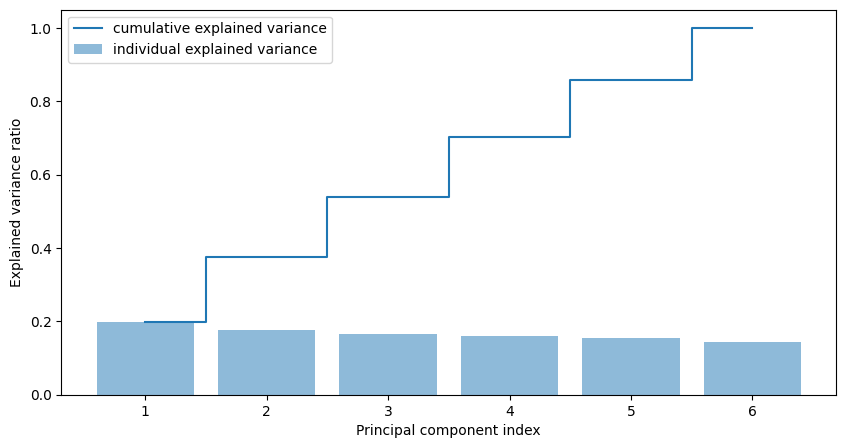

In [32]:
## Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_comps = pca.fit_transform(df_scaled) # pca components
var_exp = pca.explained_variance_ratio_ # variance explained ratio 
cum_var_exp = np.cumsum(var_exp) # cumulative variance

# plot of explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [33]:
#Let's say you would like to explain x% variance  
var_exp_thres = 0.85
#calling pcs instance with desired variance explained threshold
pca = PCA(var_exp_thres)  
pca_comps = pca.fit_transform(df_scaled)  
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres*100, pca.n_components_))

Number of components to explain 85% variance is 5


**Feature selection from PCA components**

We can also use PCA for feature selection: to identify the most important features (in the original space) to train the model on

In [34]:
# get the index of the most important feature on EACH component
# we do it using list comprehension
most_important_features_idx = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
most_important_features = df.columns[most_important_features_idx]

print('The most important features are:', most_important_features.values)

The most important features are: ['TransactionTime' 'CustomerID' 'CustGender' 'CustomerID' 'CustLocation']


### 3. Kmeans
Our objective is to identify customer clusters, and we'll begin by employing the 𝑘-means clustering algorithm. 𝑘-means clustering involves dividing 𝑛 data points into 𝑘 clusters, where each data point is assigned to the cluster with the nearest mean (cluster centers or cluster centroid). These centroids act as prototypes for their respective clusters. Two approaches for clustering are as follows:

a) Utilize the most significant PCA components as feature variables and perform clustering based on them.

b) Choose features by assessing their importance from the PCA components, and then use these selected features for the clustering process.

We intend to explore both of these strategies.

In [35]:
!pip install yellowbrick


In [36]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer  

##### 3a) Kmeans on the important Principal Components (PCs)

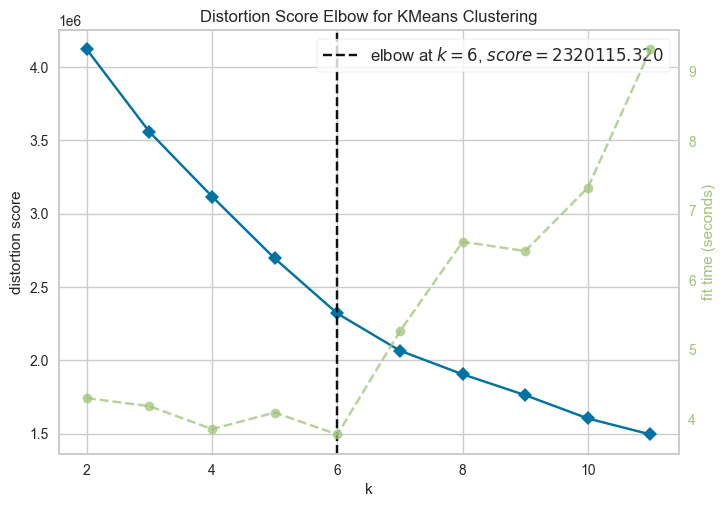

The best cluster number is: 6


In [41]:
## performing the elbow method
# Instantiate the clustering model and visualizer
kmeans = KMeans(random_state=3092) # you should remove the random_state in general. This is done for demonstration purposes.
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(pca_comps)        #Fit the important PCA component data to the visualizer
visualizer.show()        # Finalize and render the figure
print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

Now we perform the final Kmeans on 7 clusters

In [42]:
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(pca_comps)
#saving the cluster labels
Kmeans_clusters_PCs = kmeans_best_cluster.labels_

##### 3b) Kmeans on the important features computed from the PCA components 

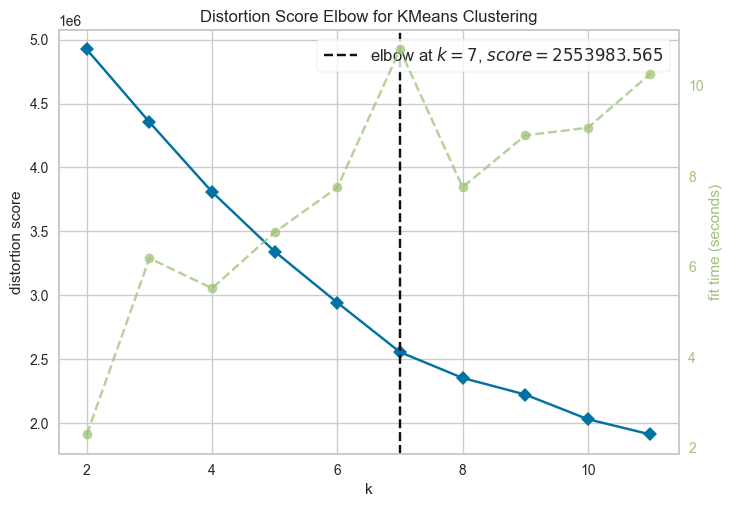

Elbow Value: 7


In [43]:
# most_important_features contains the features you want to use for clustering
all_features = df_scaled.columns

# using KMeans for clustering
kmeans = KMeans(random_state=3092)
visualizer = KElbowVisualizer(kmeans, k=(2, 12))
visualizer.fit(df_scaled[all_features])
visualizer.show()
elbow_value = visualizer.elbow_value_
print("Elbow Value:", elbow_value)


Evaluation Metrics for the Model:

In assessing the performance of our model, we will utilize two key metrics:

1. **Silhouette Coefficient:**
   The Silhouette Coefficient, or silhouette score, serves as a metric for evaluating the effectiveness of a clustering technique. It produces a value within the range of -1 to 1, where:
   - 1 indicates that clusters are well-separated and distinctly defined.
   - 0 suggests that clusters are indifferent, indicating insignificant distance between them.
   - -1 signifies that clusters are erroneously assigned.

2. **Davies-Bouldin Index (DBI):**
   The Davies-Bouldin Index is computed as the average similarity of each cluster with the cluster most similar to it. A lower average similarity indicates better separation of clusters, reflecting improved clustering results. The DBI provides valuable insights into the effectiveness of the clustering performed by the model.

In [44]:
from sklearn import metrics
sc = []
dbi = []

In [45]:
# Randomly sample 50% of the data
bank_df = df.sample(frac=0.01, random_state=42)  # random_state for reproducibility
 
# Verify the sampled data
print("Original DataFrame size:", len(df))
print("Sampled DataFrame size:", len(bank_df))


Original DataFrame size: 985322
Sampled DataFrame size: 9853


In [46]:
#metrics from imporant PC features method
sc.append(metrics.silhouette_score(pca_comps, Kmeans_clusters_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, Kmeans_clusters_PCs))

#metrics from imporant features from PCA method
sc.append(metrics.silhouette_score(df_scaled[most_important_features], Kmeans_clusters_ImpFeatures, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(df_scaled[most_important_features], Kmeans_clusters_ImpFeatures))

clusteting_methods = ['Kmean_on_PCs', 'Kmean_on_ImpFeatures']

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
df_metrics = pd.DataFrame(d)
df_metrics.set_index('clusteting_methods', inplace = True)
df_metrics

In [ ]:
!pip install seaborn


   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 4.5 MB/s eta 0:00:00


In [ ]:
import seaborn as sns

## Let us visualize how the clusters look on the first 3 PCs and 3 important fearures computed from the two methods
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(20, 7.5), dpi=100)

# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')
scatter = ax.scatter(pca_comps[:,0],pca_comps[:,1],pca_comps[:,2], c = Kmeans_clusters_PCs, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters computed from important PCs')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.view_init(-150, -30)


# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 2, projection='3d')
scatter = ax.scatter(df_scaled[most_important_features[0]],df_scaled[most_important_features[1]],df_scaled[most_important_features[2]], 
                        c = Kmeans_clusters_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# set up the axes for the 3rd plot
ax = fig.add_subplot(1, 3, 3, projection='3d')
scatter = ax.scatter(df[most_important_features[0]],df[most_important_features[1]],df[most_important_features[2]], 
                        c = Kmeans_clusters_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

KeyError: 'CustomerID'

Error in callback <function flush_figures at 0x000002D1C570B600> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 